[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PySDM-examples.git/main?urlpath=PySDM_examples/Shipway_and_Hill_2012/fig_1.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PySDM-examples/blob/main/PySDM_examples/Shipway_and_Hill_2012/fig_1.ipynb)

#### based on Fig. 1 from Shipway & Hill 2012 (Q. J. Royal Meteo. Soc. 138)  "_Diagnosis of systematic differences between multiple parametrizations of warm rain microphysics using a kinematic framework_"   
https://doi.org/10.1002/qj.1913

**NOTES**: 
- constant momentum profile rather than constant velocity profile is used herein
- enabling precipitation interpretted as turning on sedimentation and collisions
- pressure at z=0 not given in the paper, assumed (see settings.py)
- domain extended below z=0 to mimic particle inflow

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install atmos-cloud-sim-uj-utils
    from atmos_cloud_sim_uj_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [2]:
from PySDM_examples.Shipway_and_Hill_2012 import Settings, Simulation, plot
from PySDM.physics import si

In [3]:
common_params = {
    "n_sd_per_gridbox": 256,
    "dt": 5 * si.s,
    "dz": 50 * si.m,
    "p0": 980 * si.hPa,
    "kappa": .9,
    "particles_per_volume_STP": 50 / si.cm**3
}

output = {}
for rho_times_w in (
    2 * si.kg/si.m**3 * si.m/si.s,
    3 * si.kg/si.m**3 * si.m/si.s
):
    for precip in (False, True):
        key = f"rhow={rho_times_w}_p={precip}"
        output[key] = Simulation(Settings(
            **common_params,
            rho_times_w_1=rho_times_w,
            precip=precip
        )).run()[0]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


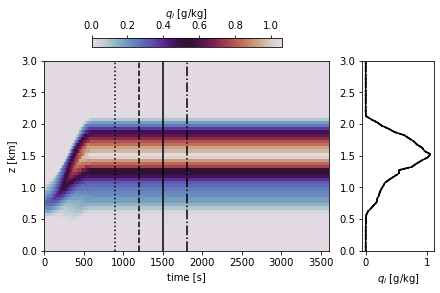

HTML(value="<a href='./ql_rhow=2_p=False.pdf' target='_blank'>./ql_rhow=2_p=False.pdf</a><br>")

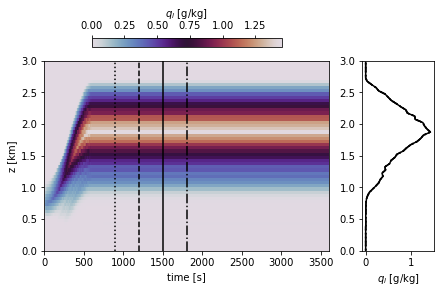

HTML(value="<a href='./ql_rhow=3_p=False.pdf' target='_blank'>./ql_rhow=3_p=False.pdf</a><br>")

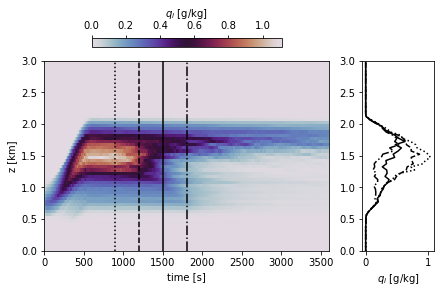

HTML(value="<a href='./ql_rhow=2_p=True.pdf' target='_blank'>./ql_rhow=2_p=True.pdf</a><br>")

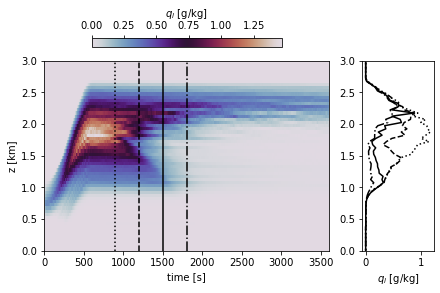

HTML(value="<a href='./ql_rhow=3_p=True.pdf' target='_blank'>./ql_rhow=3_p=True.pdf</a><br>")

In [4]:
for p in (False, True):
    for rho_times_w in (2, 3):
        plot(var='ql', qlabel='$q_l$ [g/kg]', fname=f'ql_rhow={rho_times_w}_p={p}.pdf',
             output=output[f'rhow={rho_times_w}.0_p={p}'])

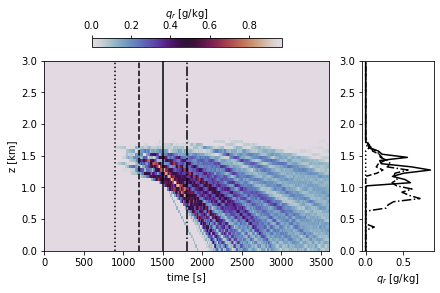

HTML(value="<a href='./qr_rhow=2_p=True.pdf' target='_blank'>./qr_rhow=2_p=True.pdf</a><br>")

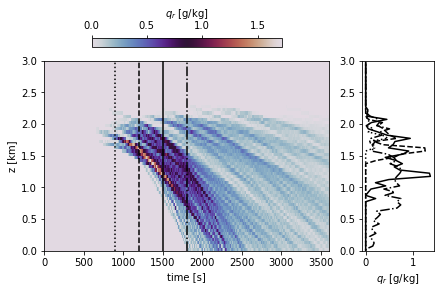

HTML(value="<a href='./qr_rhow=3_p=True.pdf' target='_blank'>./qr_rhow=3_p=True.pdf</a><br>")

In [5]:
p = True
for rho_times_w in (2, 3):
    plot(var='qr', qlabel='$q_r$ [g/kg]', fname=f'qr_rhow={rho_times_w}_p={p}.pdf',
         output=output[f'rhow={rho_times_w}.0_p={p}'])